In [118]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_3_plotting.ipynb")

## Lab 3: Plotting data

Read in the wrist torque data and plot it for each of the x, y, and z channels. I recommend doing this in the following order:

- Copy in your lecture activity code and do that plot first - make sure it's working and the titles/labels etc are correct 
- Once that's working, add a **for** loop to loop over x, y, z
- If doing a **for** loop is confusing, then start with just copying the code over, once, and changing the dimension you're using in the copy. Then go back and put the for loop in

[optional] Do nicer colors than the default ones.

For setting the colors and the data labels, you can either do it by hand, or setup a list of color names and use that
Note: Plot the data for the first pick (the first row of the spread sheet)

In [1]:
# Install a pip package in the current Jupyter kernel
# Note: this is a safety check in case your JN install was not in the same place as your libraries
import sys
!{sys.executable} -m pip install matplotlib

In [2]:
# Libraries that we need to import - numpy and json (for loading the description file)
import numpy as np
import json as json
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
wrist_torque_data = np.loadtxt('Data/Wrist_torque_data.csv',dtype=float, delimiter=',')

print(wrist_torque_data.shape) 

try:
    with open("Data/proxy_data_description.json", "r") as fp:
        pick_data_description = json.load(fp)
except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")

n_time_steps = wrist_torque_data.shape[1]/3
time_step=1/30
print(f"Number of time steps: {n_time_steps}")           
ts = ts = np.arange(0,stop=n_time_steps*time_step,step=time_step)
print(ts)

x_values = wrist_torque_data[0,::3]  
y_values = wrist_torque_data[0,1::3]
z_values = wrist_torque_data[0,2::3] 

all_vals = [x_values,y_values,z_values]



(660, 120)
Number of time steps: 40.0
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.         1.03333333 1.06666667 1.1        1.13333333 1.16666667
 1.2        1.23333333 1.26666667 1.3       ]


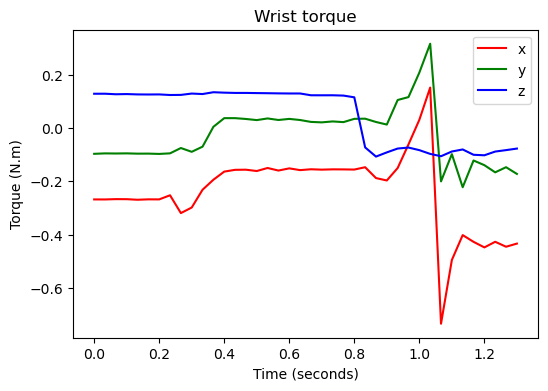

Ellipsis

In [122]:
nrows = 1
ncols = 1
fig, axs = plt.subplots(nrows,ncols, figsize=(6, 4))

# Useful for labeling the channels with x,y,z instead of 0, 1, 2
channel_labels = ['x', 'y', 'z']
colors = ['r','g','b']



for i in range(len(all_vals)):
    plt.plot(ts,all_vals[i],colors[i])
plt.title('Wrist torque')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (N.m)')
plt.legend(channel_labels)
plt.show()
 

...

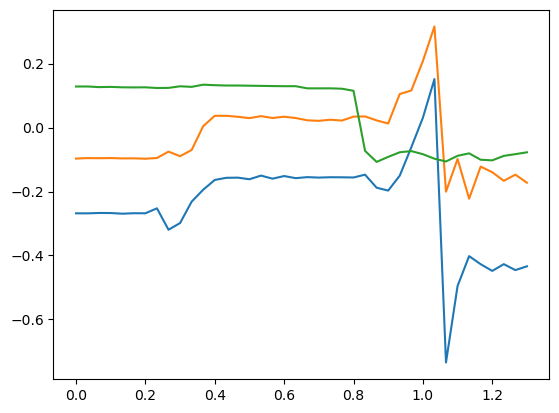

In [123]:
plt.plot(ts,x_values,ts,y_values,ts,z_values)

In [124]:
grader.check("plot_torque")

plot_torque results: All test cases passed!

## Part 2 - plot both the wrist force and the wrist torque in the same figure
Force on the left, Torque on the right. Don't forget labels and titles.

You can do this one of two ways; note that in the hwk you'll need to do the 2nd option (with some help), but if you want to try it now, feel free.
- Option 1: Copy and paste the code from above (twice) and change the relevant data/lines of code (axs[], names/titles, start index) in the second copy
- Option 2: Encapsulate the plotting part in a function then call that function twice
  - pass in the axes to plot in, along with t values (or create them within the function)
  - do the x,y,z loop inside of the plot

In [125]:
# Reading in the wrist force data for you
wrist_force_data = np.loadtxt("Data/Wrist_force_data.csv", dtype="float", delimiter=",")

In [136]:

def plot_function(axes, ts, data, channel_info):
    # See below for possible format for channel_info
    # optional do plot as a function

    for i in range(len(data)):
        axs[axes].plot(ts,data[i],colors[i])
    title = channel_info["name"]
    axs[axes].set_title(title)
    axs[axes].set_xlabel('Time (seconds)')
    ylab = channel_info["units"]
    axs[axes].set_ylabel(ylab)
    

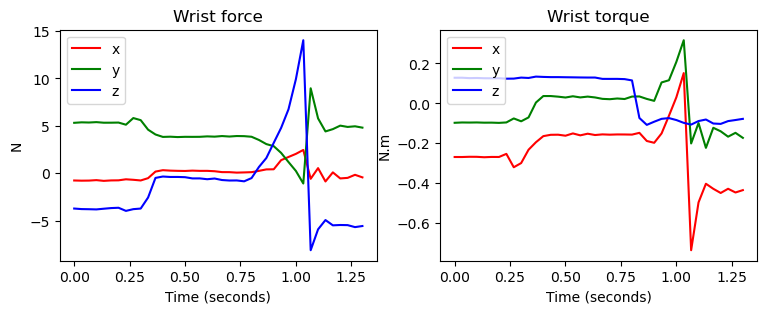

In [137]:
# Make my own channel_info - use this to pass information into the plot about what units/dimensions to use
channel_info_torque = {"name": "Wrist torque", "units":"N.m", "dimensions":3}
channel_info_force = {"name": "Wrist force", "units":"N", "dimensions":3}

force_x = wrist_force_data[0,::3]  
force_y = wrist_force_data[0,1::3]
force_z = wrist_force_data[0,2::3] 

force_vals = [force_x,force_y,force_z]

nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows,ncols, figsize = (9,3))



# Call plot function here, once with the wrist force data, once with the wrist torque data
plot_function(1,ts,all_vals,channel_info_torque)
plot_function(0,ts,force_vals,channel_info_force)
axs[0].legend(channel_labels)

axs[1].legend(channel_labels, loc = 2)


In [138]:
grader.check("plot_force_and_torque")

plot_force_and_torque results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [129]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html"}
# Approximate number of hours, including lab/in-class time
hours = 2

In [130]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit just the .ipynb file to Gradescope, Lab 3 plotting (we will provide the data files). Don't change the provided variable names or autograding will fail. Make sure your plots are visible!

In [131]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: c:\Users\yeasshhhh\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
